In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

## Ensure access to affordable, reliable, sustainable and modern energy for all

In [90]:
gdf = gpd.read_file("GeoDS4Bolivia.geojson")
print(gdf.info())
# """
# 70	sdg16_6_pbec	Programmed budget execution capacity, 2017 (%)
# 68	sdg15_5_blr	    Biodiversity loss rate due to deforestation deforestation deforestation, average 2016-2018"
# 66	sdg13_2_dra	    Deforestation rate, average 2016-2018 (% of fo...
# 65	sdg13_2_tco2e	Total CO2 emissions per capita, 2016 (tCO2/per...
# 59    sdg10_2_iec	    Inequality in electricity consumption, 2016
# 56	sdg9_c_mnc	    Fixed and mobile network coverage, 2012 (% of ...
# 53	sdg9_1_routes	Number of railways/primary roads entering/leaving the municipality, 2019"
# 51	sdg8_10_dbb	    Density of bank branches, 2018 (per 100,000 in...
# 45	sdg7_3_co2epc	CO2 emissions per capita by energy, 2016. (tCO...
# 43	sdg7_1_rec	    Residential electricity consumption per capita...
# 42	sdg7_1_ec	    Electricity coverage, 2012 (% of population) population)"
# """

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 339 entries, 0 to 338
Columns: 143 entries, asdf_id to geometry
dtypes: float64(99), geometry(1), int64(34), object(9)
memory usage: 378.9+ KB
None


In [91]:
gdf.head(5)

,asdf_id,shapeName,COORD_X,COORD_Y,poly_id,mun,mun_id,dep,dep_id,dep_mun,shapeID,imds,rank_imds,population_2020,urbano_2012,sdg1_1_eepr,sdg1_1_ubn,sdg1_2_mpi,sdg1_4_abs,sdg2_2_cmc,sdg2_2_oww,sdg2_4_pual,sdg2_4_td,sdg3_1_idca,sdg3_2_imr,sdg3_2_mrc,sdg3_3_cdir,sdg3_3_di,sdg3_3_imr,sdg3_3_ti,sdg3_3_hivi,sdg3_7_afr,sdg4_1_ssdrm,sdg4_1_ssdrf,sdg4_4_phe,sdg4_6_lr,sdg4_c_qti,sdg4_c_qts,sdg5_1_gpsd,sdg5_1_gpyp,sdg5_1_gpmpi,sdg5_5_gpop,sdg6_1_dwc,sdg6_2_sc,sdg6_3_wwt,sdg7_1_ec,sdg7_1_rec,sdg7_1_cce,sdg7_3_co2epc,sdg8_4_rem,sdg8_5_oprm,sdg8_5_ofrm,sdg8_6_mlm,sdg8_6_wlm,sdg8_10_dbb,sdg8_11_idi,sdg9_1_routes,sdg9_5_cd,sdg9_5_eutf,sdg9_c_mnc,sdg9_c_drb,sdg10_2_gcye,sdg10_2_iec,sdg10_2_nssp,sdg11_1_hocr,sdg11_1_hno,sdg11_2_samt,sdg13_1_ccvi,sdg13_2_tco2e,sdg13_2_dra,sdg15_1_pa,sdg15_5_blr,sdg16_1_rhr,sdg16_6_pbec,sdg16_9_cr,sdg17_1_pmtax,sdg17_5_pipc,index_sdg1,index_sdg2,index_sdg3,index_sdg4,index_sdg5,index_sdg6,index_sdg7,index_sdg8,index_sdg9,index_sdg10,index_sdg11,index_sdg13,index_sdg15,index_sdg16,index_sdg17,pop2001,pop2002,pop2003,pop2004,pop2005,pop2006,pop2007,pop2008,pop2009,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,pop2020,ln_NTLpc2012,ln_NTLpc2013,ln_NTLpc2014,ln_NTLpc2015,ln_NTLpc2016,ln_NTLpc2017,ln_NTLpc2018,ln_NTLpc2019,ln_NTLpc2020,ln_t400NTLpc2012,ln_t400NTLpc2013,ln_t400NTLpc2014,ln_t400NTLpc2015,ln_t400NTLpc2016,ln_t400NTLpc2017,ln_t400NTLpc2018,ln_t400NTLpc2019,ln_t400NTLpc2020,co2015,co2016,co2017,co2018,co2019,co2020,tr400_co2015,tr400_co2016,tr400_co2017,tr400_co2018,tr400_co2019,tr400_co2020,geometry
0,0,Esmeralda,-68.086369,-18.945744,178,Esmeralda,40505,Oruro,5,Oruro-Esmeralda,BOL-ADM3-33444609B20338026,53.200001,108,2854,0,NaN,78.300003,0.100,10.800000,19.200001,20.6,47.099998,0.0,43.200001,28.700001,34.700001,0,0,0,0,0,14,0,0,11.8,97.800003,40,53.599998,1,1,0.6,0.6,95.500000,15,0,82.400002,2,37,0.1,NaN,68.500000,43.900002,14.7,26.200001,0,0,1,0,NaN,52,0.4,0.28,NaN,8.100000,44.099998,87.699997,552.5,2,0.1,0,0,0,0,82.900002,86.699997,10.7,1082,34.759998,55.080002,85.690002,68.860001,58.529999,34.540001,52.230000,30.920000,24.530001,83.940002,32.560001,77.379997,50,82.400002,26.889999,962.03308,1051.7993,1148.5365,1242.4298,1364.5643,1486.7859,1625.0844,1772.2502,1946.8031,2044.5874,2275.4063,2564.9146,2820.8704,3077.3789,3359.6067,3707.0911,4065.6479,4454.5977,4886.9614,5354.1050,11.729473,12.111817,10.962022,11.699198,13.085610,13.647187,13.667681,13.595437,13.489282,11.414175,11.726494,12.039332,12.354541,12.671274,12.987050,13.300419,13.611585,13.921671,400.66104,402.31870,404.97272,406.84192,408.98264,410.99747,400.56021,402.63989,404.73074,406.83206,408.94409,411.06708,"MULTIPOLYGON (((-68.26703 -18.81616, -68.23937..."
1,1,Santuario de Quillacas,-66.813557,-19.318918,169,Quillacas,40202,Oruro,5,Oruro-Quillacas,BOL-ADM3-33444609B53994240,50.500000,171,4474,0,88.300003,73.599998,0.150,19.299999,31.500000,19.5,7.700000,87.0,41.000000,48.599998,64.599998,0,0,0,23,0,55,1,0,12.1,94.800003,33,25.000000,2,0,1.2,0.9,60.500000,25,0,64.599998,27,49,0.2,18.1,78.699997,67.400002,6.8,14.700000,0,0,2,3,18.200001,45,2.8,0.35,30,16.700001,22.400000,77.199997,0.0,2,0.2,0,0,0,0,53.700001,90.099998,0.0,443,27.950001,34.820000,70.199997,57.730000,87.529999,21.840000,50.110001,56.599998,46.639999,74.089996,30.680000,75.440002,50,69.720001,4.380000,3312.91750,3382.0591,3447.3469,3509.0361,3575.7029,3654.4546,3723.5171,3791.8071,3862.3999,3931.6042,4008.8794,4093.4082,4171.9414,4262.7119,4357.5601,4434.0586,4517.6450,4591.6426,4682.3174,4778.1196,12.965525,13.142761,13.074501,13.143079,12.948340,13.821883,13.822321,13.803769,14.016370,12.862933,12.999367,13.136051,13.273612,13.412519,13.552914,13.693778,13.834767,13.975857,398.69547,402.18451,404.49866,406.64880,408.32587,410.74161,399.42441,401.71268,404.01230,406.32236,408.64389,410.97791,"MULTIPOLYGON (((-66.50208 -19.35990, -66.56355..."
2,2,Pampa Aullagas,-67.165981,-19.231799,185,Pampa Aullagas,40802,Oruro,5,Oruro-Pampa Aullagas,BOL-A

In [54]:
"""
42 sdg7_1_ec: Electricity coverage, 2012 (% of population)
43 sdg7_1_rec: Residential electricity consumption per capita, 2016 (kWh/person/year)
44 sdg7_1_cce: Clean cooking energy, 2012 (% of households)
45 sdg7_3_co2epc: CO2 emissions per capita by energy, 2016. (tCO2/person/year)
"""
df = gdf[["sdg10_2_iec", "sdg7_3_co2epc", "sdg7_1_rec", "sdg7_1_ec", "sdg7_1_cce"]]
print(df.info())
# Column rename for easy understanding 
df.rename(columns={'sdg10_2_iec':'elec_consum_inequal', 'sdg7_3_co2epc': 'CO2_percapita', 'sdg7_1_rec':'elect_consumption', 'sdg7_1_ec':'elec_covarage', 'sdg7_1_cce':'clean_cookingenergy'}, inplace=True)
print(df.info())
print()
print(df.isnull().sum())
print()
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sdg10_2_iec    315 non-null    object 
 1   sdg7_3_co2epc  339 non-null    float64
 2   sdg7_1_rec     339 non-null    int64  
 3   sdg7_1_ec      339 non-null    float64
 4   sdg7_1_cce     339 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 13.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   elec_consum_inequal  315 non-null    object 
 1   CO2_percapita        339 non-null    float64
 2   elect_consumption    339 non-null    int64  
 3   elec_covarage        339 non-null    float64
 4   clean_cookingenergy  339 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 13.4+ KB
Non

In [34]:
# Transform 'elec_consum_inequal' from object to numeric datatype
df['elec_consum_inequal'] = pd.to_numeric(df['elec_consum_inequal'], errors='coerce', downcast ='signed')
df = df.dropna()
print(df.isnull().sum())
print(df.info())

elec_consum_inequal    0
CO2_percapita          0
elect_consumption      0
elec_covarage          0
clean_cookingenergy    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1 to 338
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   elec_consum_inequal  315 non-null    float64
 1   CO2_percapita        315 non-null    float64
 2   elect_consumption    315 non-null    int64  
 3   elec_covarage        315 non-null    float64
 4   clean_cookingenergy  315 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 14.8 KB
None


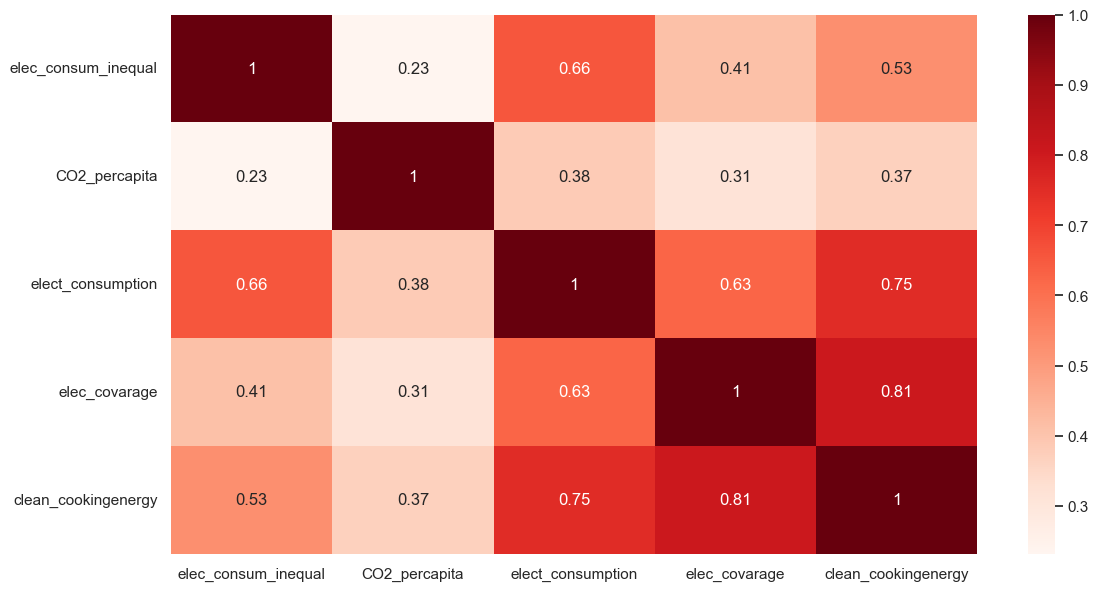

In [53]:
# Correlation Heatmap for data set
dfCorr = df.corr()
#
sns.set_theme()
plt.figure(figsize=(13,7))
sns.heatmap(dfCorr, annot=True, cmap="Reds")
plt.show()

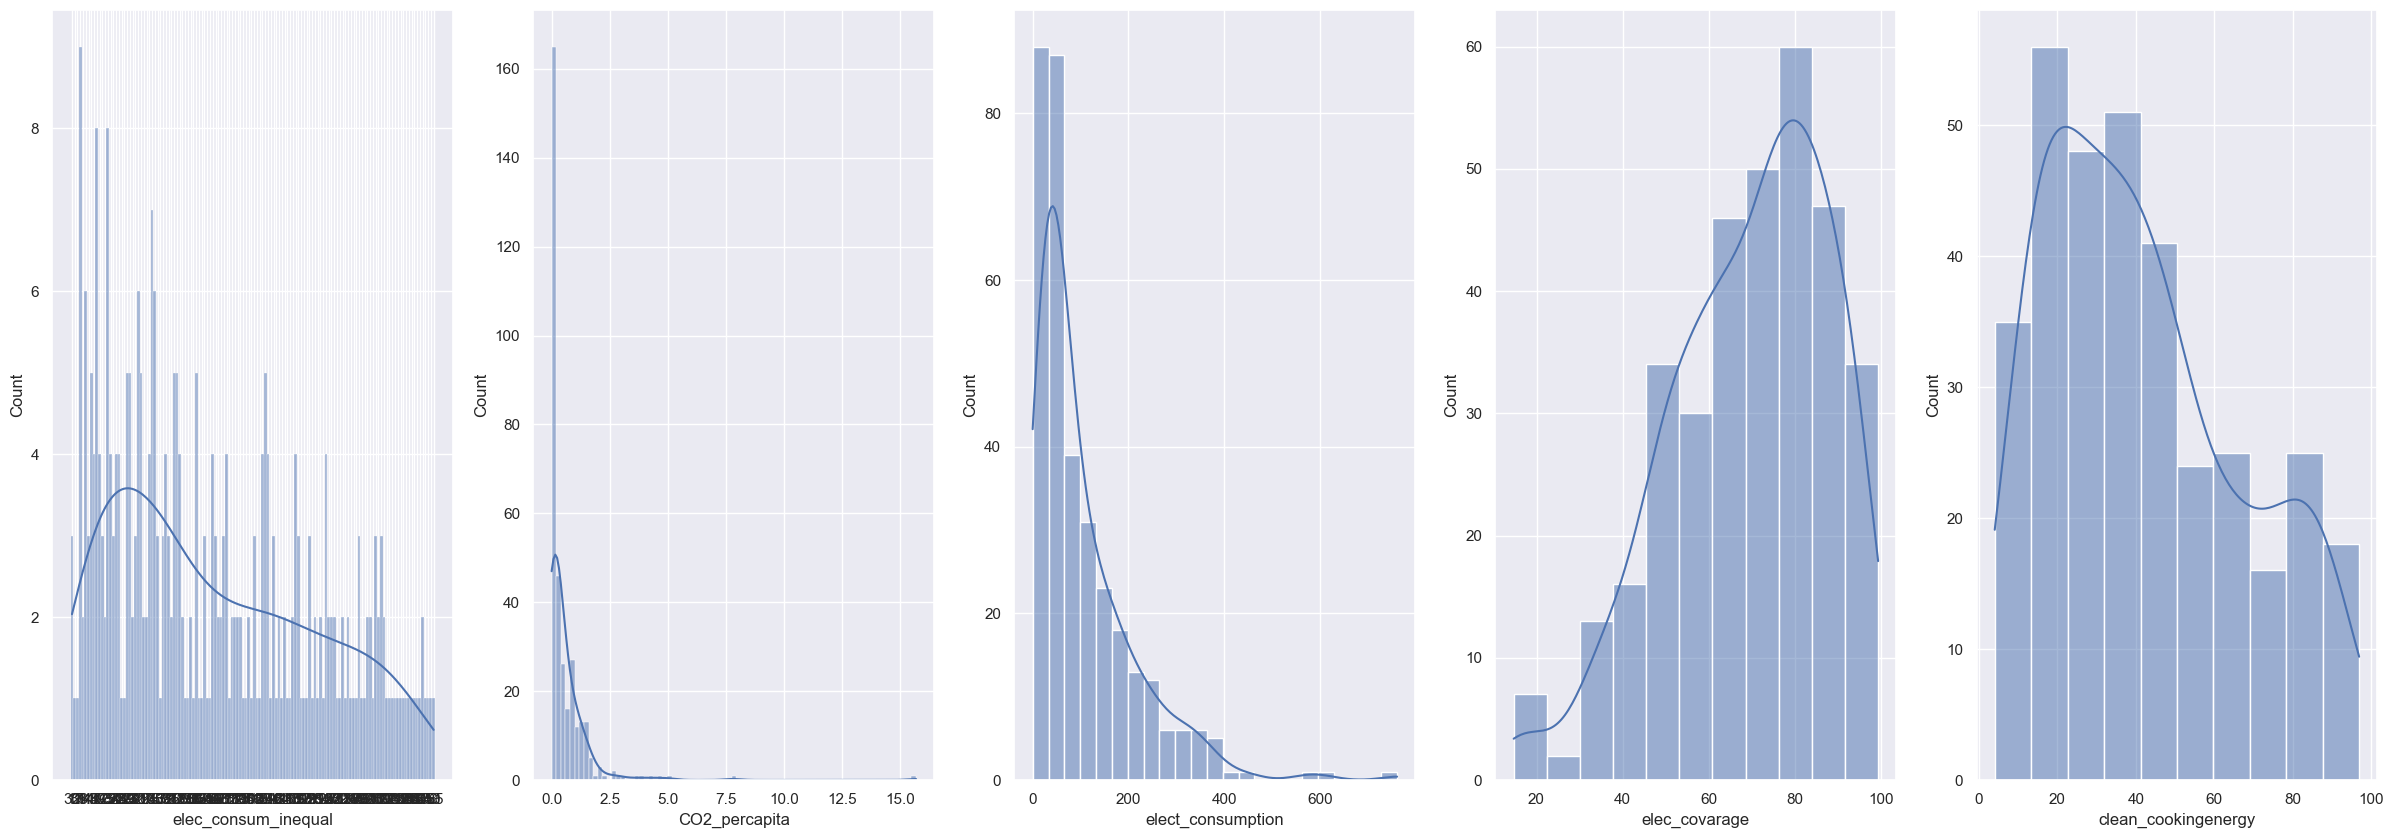

In [72]:
# Histogram plots for each variable

fig, axs = plt.subplots(ncols=5, figsize=(30, 10)) # to make both plots show as one

#
sns.histplot(data=df, x="elec_consum_inequal", kde=True, ax=axs[0])
axs[0].set(xlabel = 'elec_consum_inequal')
#
sns.histplot(data=df, x="CO2_percapita", kde=True, ax=axs[1])
axs[1].set(xlabel='CO2_percapita')
#
sns.histplot(data=df, x="elect_consumption", kde=True, ax=axs[2])
axs[2].set(xlabel='elect_consumption')
#
sns.histplot(data=df, x="elec_covarage", kde=True, ax=axs[3])
axs[3].set(xlabel='elec_covarage')
#
sns.histplot(data=df, x="clean_cookingenergy", kde=True, ax=axs[4])
axs[4].set(xlabel='clean_cookingenergy')
plt.show()

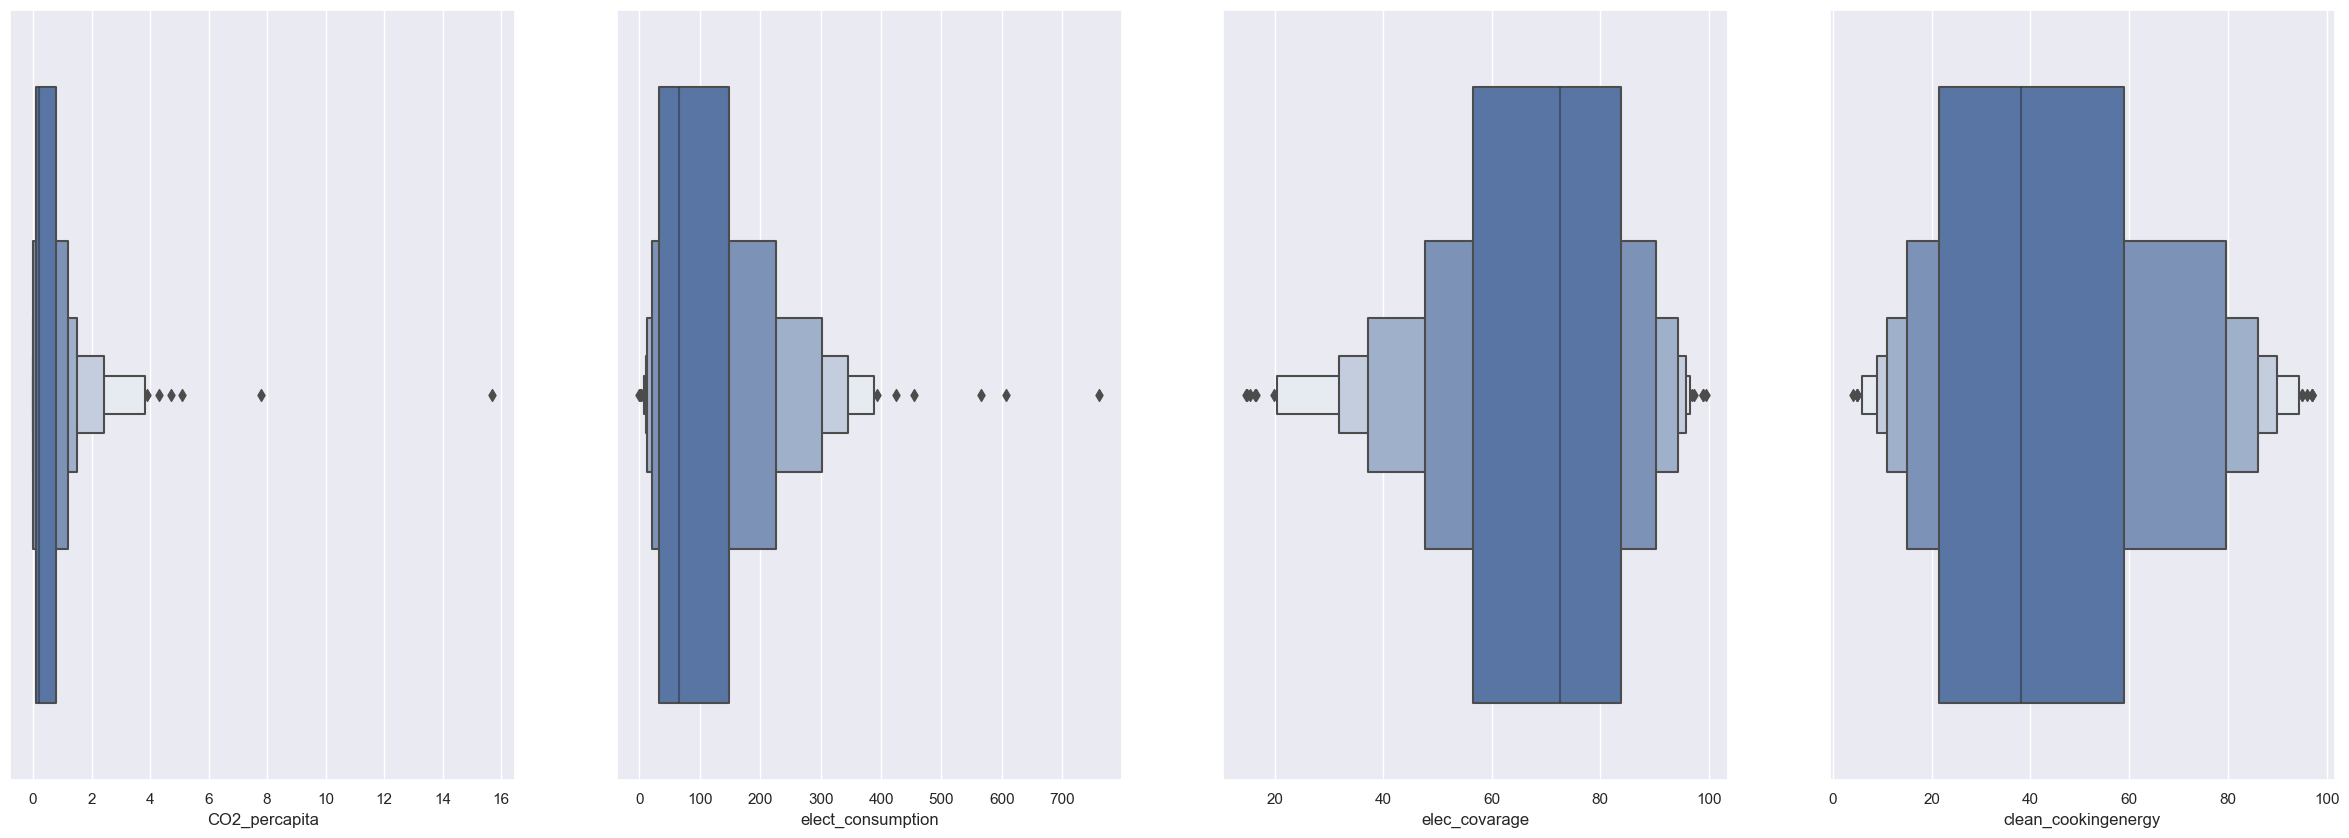

In [71]:
# Boxplots for each of the variable

fig, axs = plt.subplots(ncols=4, figsize=(30, 10))

sns.boxenplot(data=df, x="CO2_percapita", ax=axs[0])
axs[0].set(xlabel = 'CO2_percapita')
#
sns.boxenplot(data=df, x="elect_consumption", ax=axs[1])
axs[1].set(xlabel = 'elect_consumption')
#
sns.boxenplot(data=df, x="elec_covarage", ax=axs[2])
axs[2].set(xlabel = 'elec_covarage')
#
sns.boxenplot(data=df, x="clean_cookingenergy", ax=axs[3])
axs[3].set(xlabel = 'clean_cookingenergy')
plt.show()

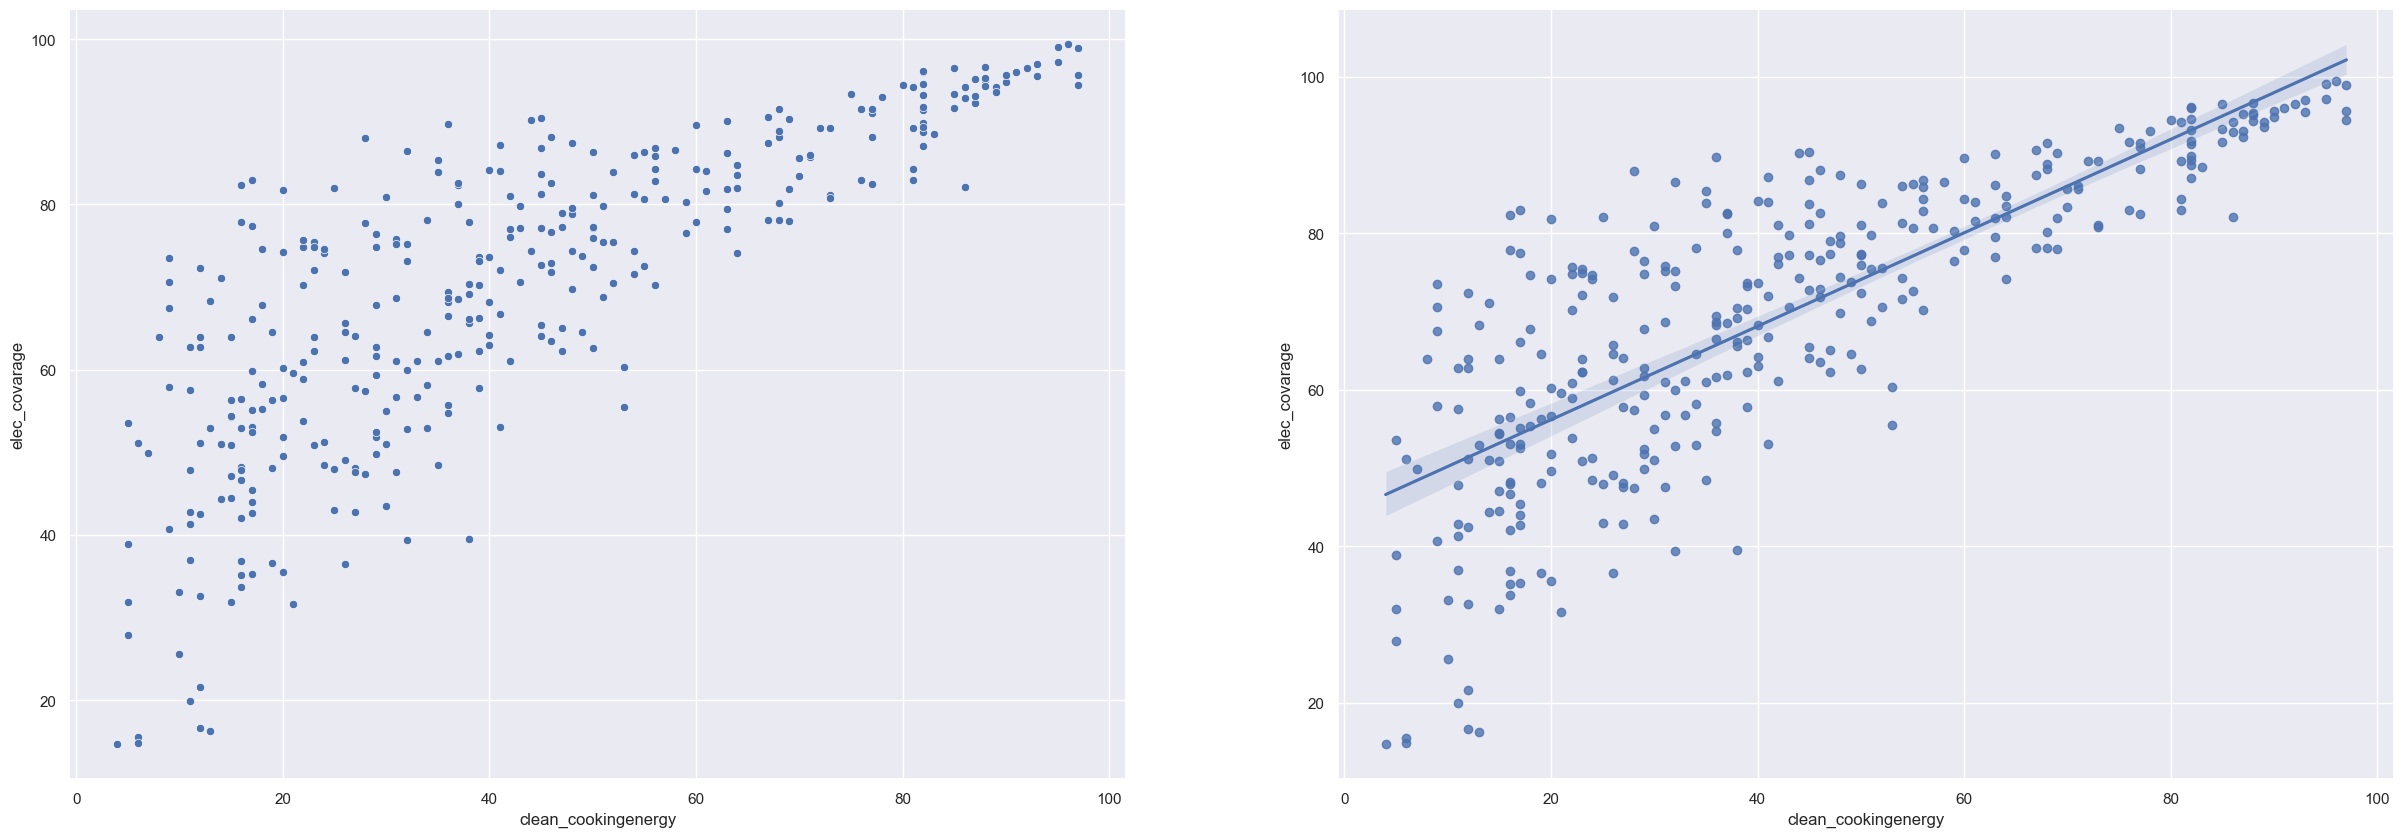

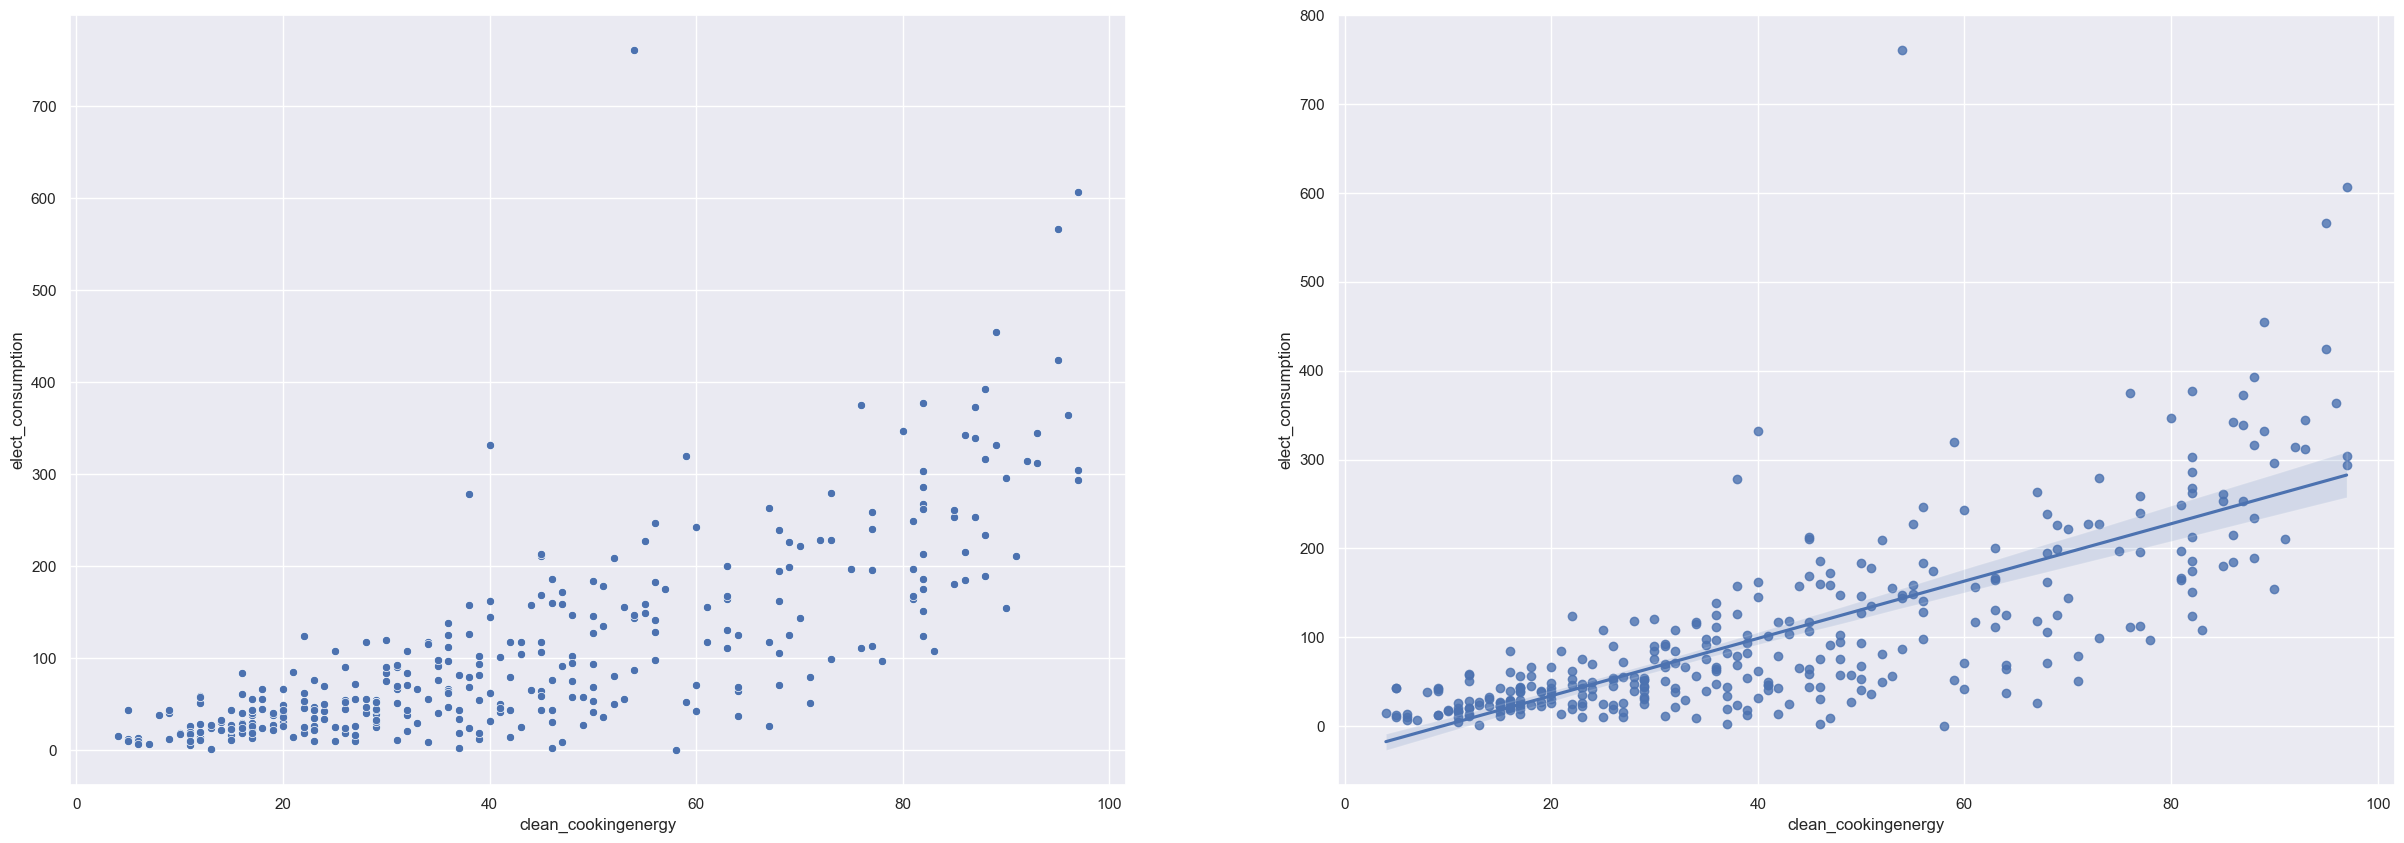

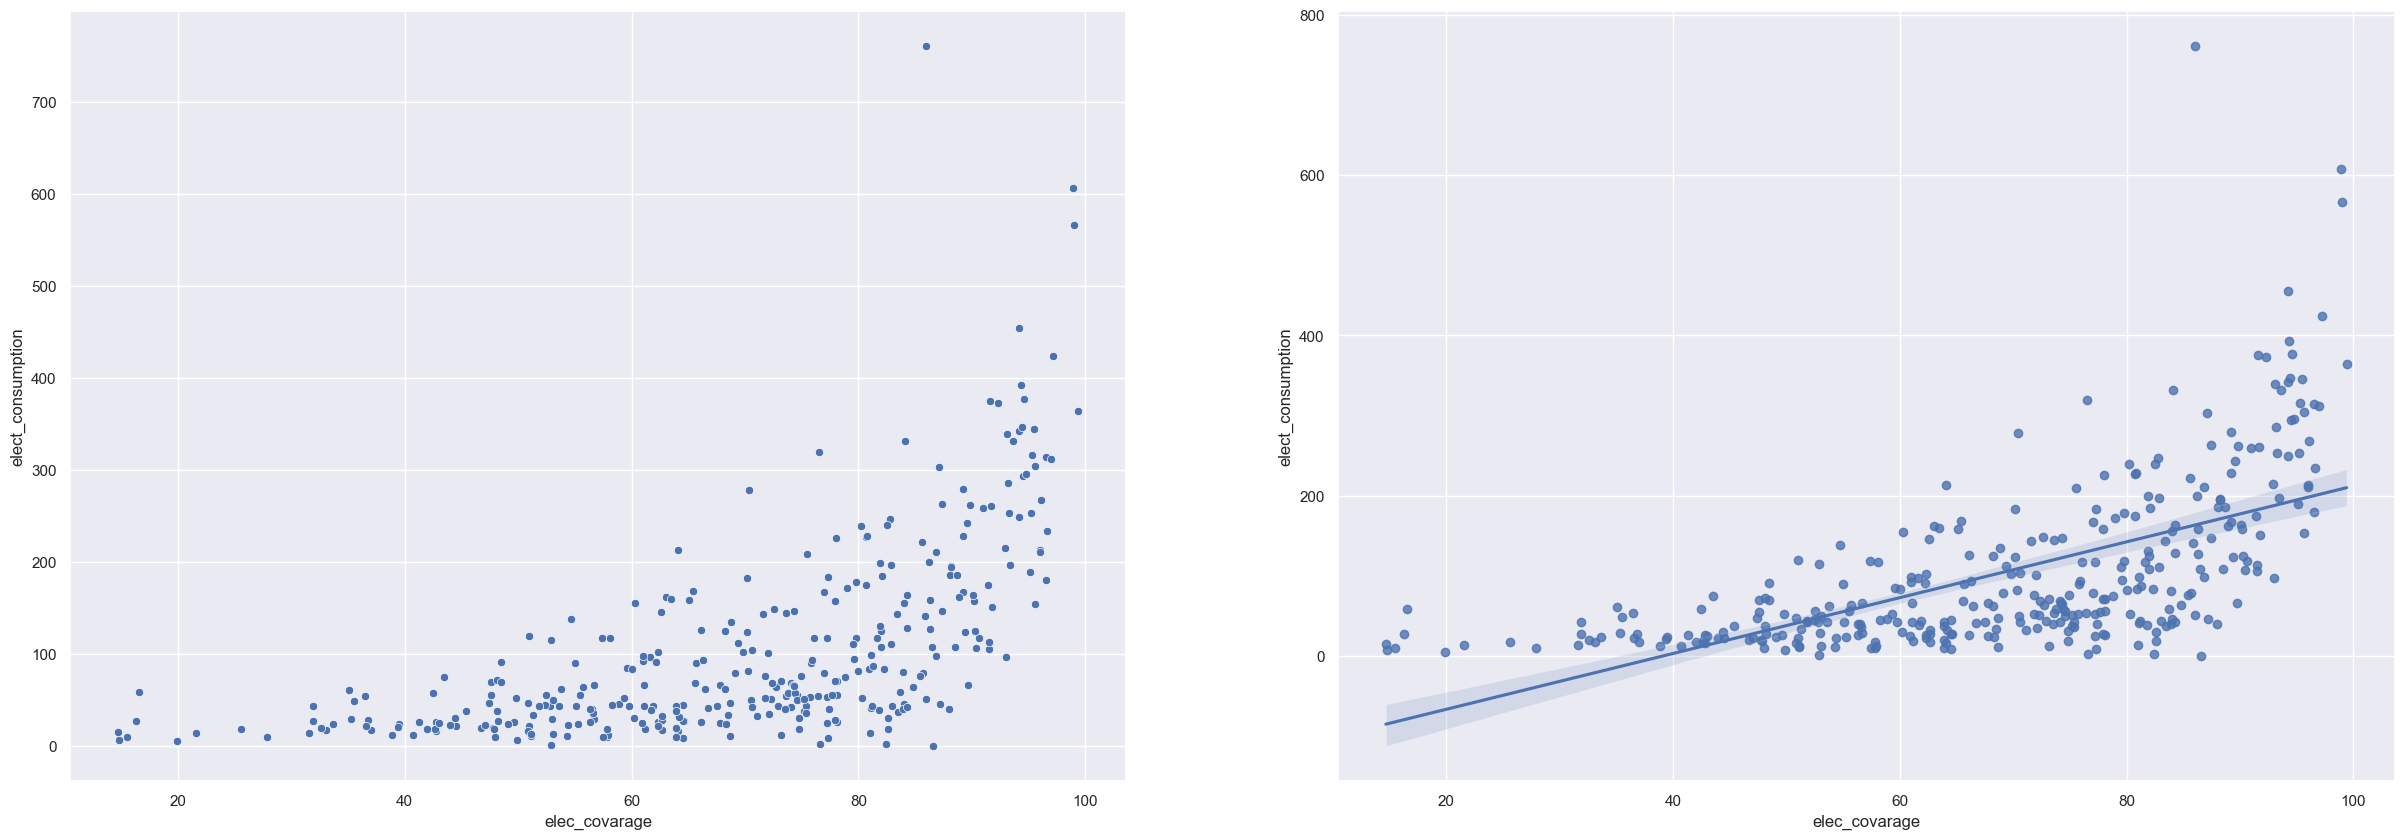

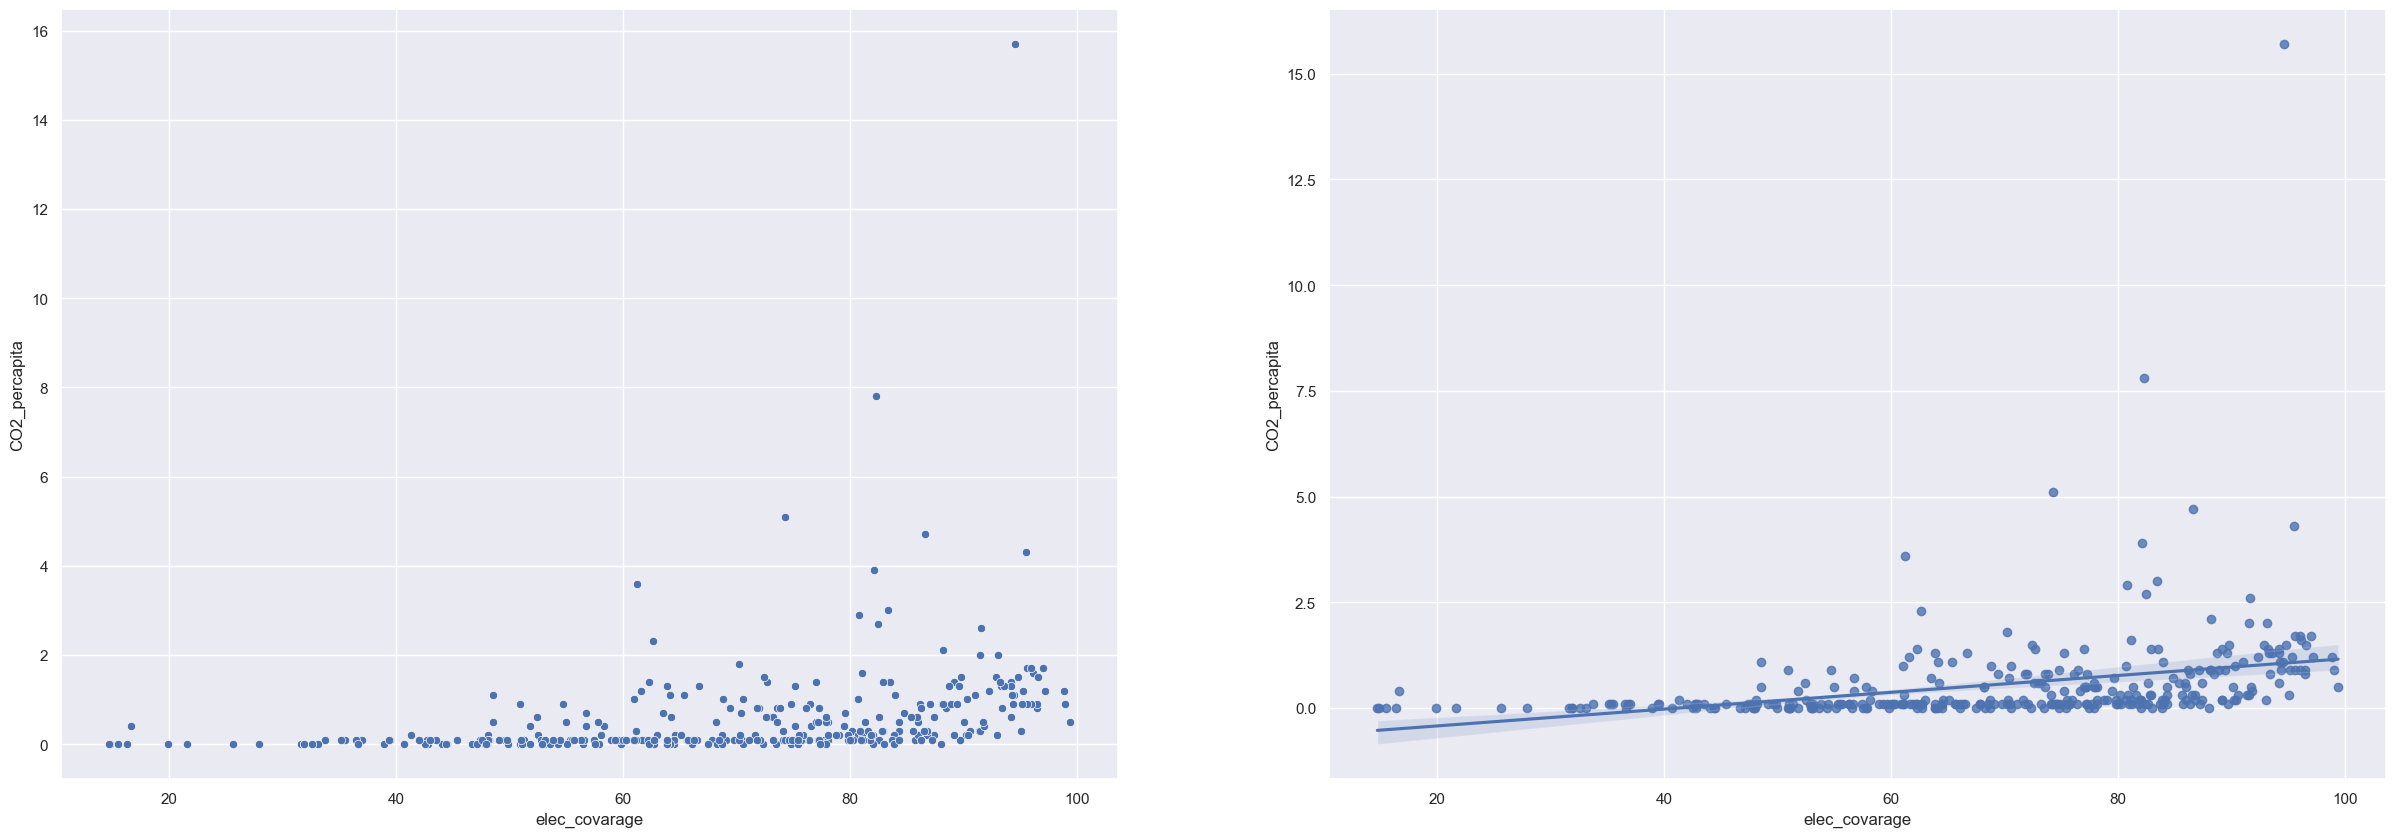

In [86]:
# Scatterplot and regresion plot for clean_cookingenergy & elec_covarage that have correlation of 0.81
fig, axs = plt.subplots(ncols=2, figsize=(30, 10)) 
sns.scatterplot(data=df, x="clean_cookingenergy", y="elec_covarage", ax=axs[0])
sns.regplot(x="clean_cookingenergy", y="elec_covarage", data=df, ax=axs[1])
plt.show()


# Scatterplot and regresion plot for clean_cookingenergy & elect_consumption that have correlation of 0.75
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))
sns.scatterplot(data=df, x="clean_cookingenergy", y="elect_consumption", ax=axs[0])
sns.regplot(x="clean_cookingenergy", y="elect_consumption", data=df, ax=axs[1])
plt.show()


# Scatterplot and regresion plot for elec_covarage & elect_consumption that have correlation of 0.63
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))
sns.scatterplot(data=df, x="elec_covarage", y="elect_consumption", ax=axs[0])
sns.regplot(x="elec_covarage", y="elect_consumption", data=df, ax=axs[1])
plt.show()


#Scatterplot adn regresion plot for elec_covarage & CO2_percapita that have correlation of 0.63
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))
sns.scatterplot(data=df, x="elec_covarage", y="CO2_percapita", ax=axs[0])
sns.regplot(x="elec_covarage", y="CO2_percapita", data=df, ax=axs[1])
plt.show()


